# Lab Segmentation 2

In [3]:
from commonfunctions import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def getThreshold(img):
    #1. Convert to 'uint8':
    if(img.dtype != 'uint8'):
        img = np.array(img * 255).astype('uint8')
    
    #2. Get Histogram:
    histo, bins = histogram(img)
    
    #3. Initialize Threshold:
    img_size = img.shape[0] * img.shape[1]
    th = round(np.sum( np.multiply(histo, bins) ) / img_size)
    print(th)
    #4. Get two weighted averages:
    low = round(np.sum(histo[bins < th] * bins[bins < th]) / np.sum(histo[bins < th]))
    high = round(np.sum(histo[bins >= th] * bins[bins >= th]) / np.sum(histo[bins >= th]))
    
    #5. Get new threshold:
    new_th = round((low + high) / 2)
    print(new_th)
    #6. Repeat untill saturation:
    while(new_th != th):
        th = new_th
        low = round(np.sum(histo[bins < th] * bins[bins < th]) / np.sum(histo[bins < th]))
        high = round(np.sum(histo[bins >= th] * bins[bins >= th]) / np.sum(histo[bins >= th]))
    
        #5. Update the threshold:
        new_th = round((low + high) / 2)
        print(new_th)
    print('_________')
    return int(th)

119.0
102.0
92.0
90.0
88.0
88.0
_________


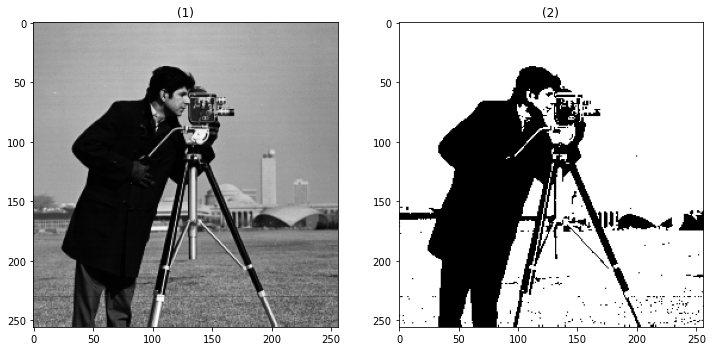

156.0
151.0
147.0
144.0
143.0
143.0
_________


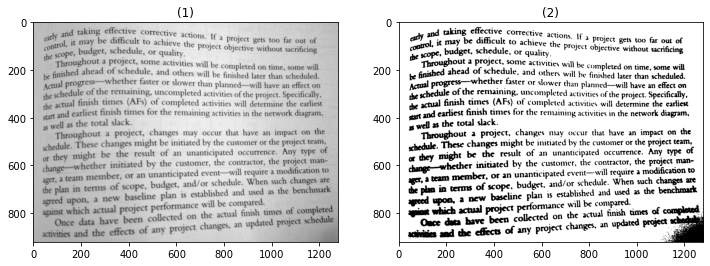

128.0
136.0
138.0
138.0
_________


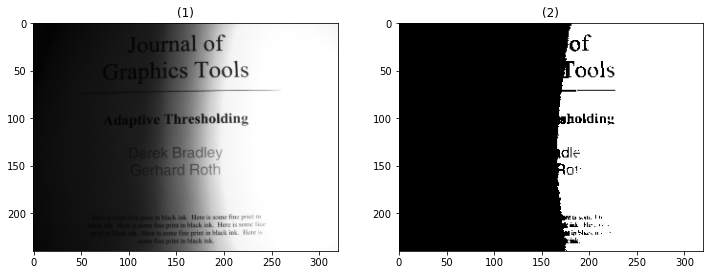

In [7]:
#1. Read the images:
cam_img = io.imread('cameraman.png',as_gray = True)
#cufe_img = io.imread('cufe.png', as_gray = True)
book1_img = io.imread('book1.png', as_gray = True)
book_img = io.imread('book.png', as_gray = True)

#2. binarize, show original and binarized:
show_images([cam_img, cam_img > getThreshold(cam_img)])
#show_images([cufe_img, cufe_img > (getThreshold(cufe_img) / 255)])
show_images([book1_img, book1_img > (getThreshold(book1_img) / 255)])
show_images([book_img, book_img > getThreshold(book_img)])
#print(getThreshold(book_img))



128.0
136.0
138.0
138.0
_________
27.0
34.0
40.0
44.0
45.0
46.0
46.0
_________
32.0
41.0
46.0
48.0
50.0
50.0
_________
224.0
198.0
189.0
186.0
186.0
_________
230.0
208.0
200.0
197.0
196.0
196.0
_________


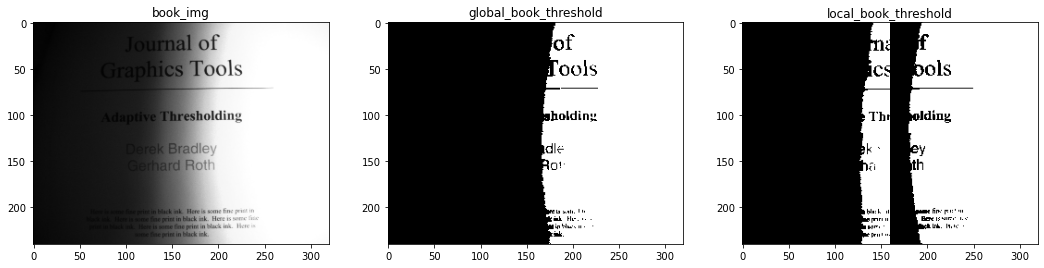

In [9]:
#1. Global thresholding:
global_book_threshold_img = book_img > getThreshold(book_img)

#2. Local thresholding:
#2.1 Partition the image:
middle_pt = (int(book_img.shape[0] / 2), int(book_img.shape[1] / 2))

top_left_img = book_img[0:middle_pt[0], 0:middle_pt[1]]
buttom_left_img = book_img[middle_pt[0]:book_img.shape[0], 0:middle_pt[1]]
top_right_img = book_img[0:middle_pt[0], middle_pt[1]:book_img.shape[1]] # +1
buttom_right_img = book_img[middle_pt[0]:book_img.shape[0], middle_pt[1]:book_img.shape[1]]

#io.imshow(buttom_right_img)
#plt.show()

#2.2 Binarize sub-images:
top_left_img = top_left_img > getThreshold(top_left_img)
buttom_left_img = buttom_left_img > getThreshold(buttom_left_img)
top_right_img = top_right_img > getThreshold(top_right_img)
buttom_right_img = buttom_right_img > getThreshold(buttom_right_img)

#print(getThreshold(top_right_img))
#io.imshow(buttom_right_img)
#plt.show()

#2.3 Combine sub-images:
local_book_threshold_img = np.block([
    [top_left_img,    top_right_img   ],
    [buttom_left_img, buttom_right_img]
])



show_images([book_img, global_book_threshold_img, local_book_threshold_img],
            ['book_img', 'global_book_threshold', 'local_book_threshold'])



In [10]:
#test:
#arr1 = np.array([1,2,3,4,5,6,7])
#print(arr1[1:3])#end element is excluded

#arr2 = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
#print(arr2[0:1][0:1]) #What happens here???
#print(arr2[0:1, 0:1])

#Check parts:
#io.imshow(book_img[0:middle[0], 0:middle[1]])
#io.imshow(book_img[middle[0]:book_img.shape[0] + 1, 0:middle[1]])
#io.imshow(book_img[0:middle[0], middle[1]:book_img.shape[1] + 1])
#io.imshow(book_img[middle[0]:book_img.shape[0] + 1, middle[1]:book_img.shape[1] + 1])

128.0
136.0
138.0
138.0
_________
16.0
15.0
15.0
_________
43.0
50.0
52.0
54.0
54.0
_________
199.0
188.0
184.0
183.0
182.0
182.0
_________
254.0
252.0
252.0
_________


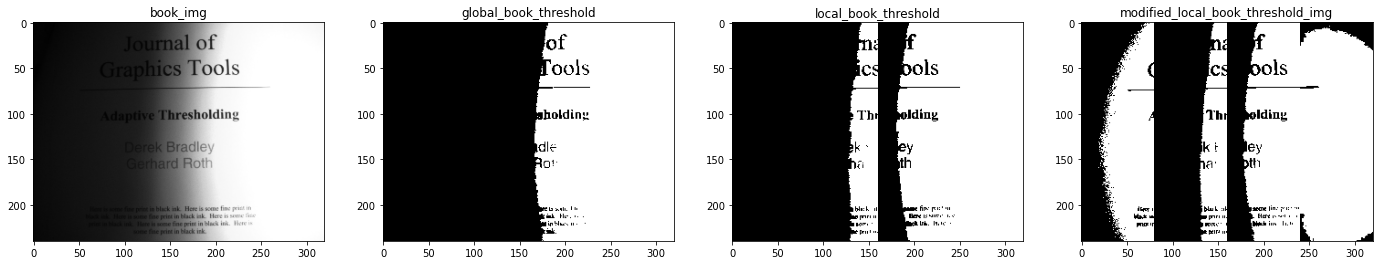

In [11]:
#1. Global thresholding:
global_book_threshold_img = book_img > getThreshold(book_img)

#2. Modified Local thresholding:
#Idea: use vertical slices
#Reason: reduce the change(from light) in each part, the change is horizontal, so slice vertically
#2.1 Partition the image:
down_end_pt = (int(book_img.shape[0]), int(book_img.shape[1]))
first_pt = int(book_img.shape[1] / 4)
second_pt = int(first_pt + first_pt)
third_pt = int(second_pt + first_pt)
fourth_pt = int(third_pt + first_pt)

far_left_img = book_img[0:down_end_pt[0], 0:first_pt]
middle_left_img = book_img[0:down_end_pt[0], first_pt:second_pt]
middle_right_img = book_img[0:down_end_pt[0], second_pt:third_pt]
far_right_img = book_img[0:down_end_pt[0],third_pt:fourth_pt + 1]


#2.2 Binarize sub-images:
far_left_img = far_left_img > getThreshold(far_left_img)
middle_left_img = middle_left_img > getThreshold(middle_left_img)
middle_right_img = middle_right_img > getThreshold(middle_right_img)
far_right_img = far_right_img > getThreshold(far_right_img)


#2.3 Combine sub-images:
modified_local_book_threshold_img = np.block([
    [far_left_img, middle_left_img, middle_right_img, far_right_img],
])


show_images([book_img, global_book_threshold_img, local_book_threshold_img, modified_local_book_threshold_img],
            ['book_img', 'global_book_threshold', 'local_book_threshold', 'modified_local_book_threshold_img'])



In [11]:
#For further enhancement:
#We can take the right part from the global image. and slice vertically the left part.
#We may increase the number of vertical slices to reduce the change accross the image.
#Histogram equalizer
#...

In [15]:
def HistEqualization(img):
    H=np.zeros((1,256))
    hist=histogram(img)
    for i in range(len(hist[0])):
        H[0,hist[1][i]]=hist[0][i]
    H_C=np.copy(H)
    for i in range(1,256):
        H_C[0,i]=H_C[0,i]+H_C[0,i-1]
    H_C=H_C/(img.shape[0]*img.shape[1])
    mapping=np.round(255*H_C)
    Vimg=np.reshape(img,(img.shape[0]*img.shape[1],1))
    for i in range(Vimg.shape[0]):
        index=Vimg[i,0]
        Vimg[i,0]=mapping[0,index] 
    img=np.reshape(Vimg,(img.shape[0],img.shape[1]))
    return img


128.0
136.0
138.0
138.0
_________
131.0
131.0
_________
131.0
131.0
_________


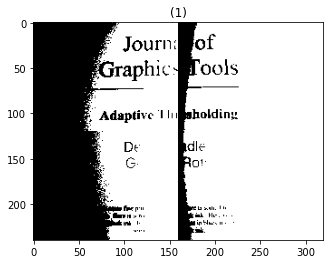

In [16]:
from skimage import exposure



#1. Global thresholding:
global_book_threshold_img = book_img > getThreshold(book_img)

#2. Local thresholding:
#2.1 Partition the image:
middle_pt = (int(book_img.shape[0] / 2), int(book_img.shape[1] / 2))

top_left_img = book_img[0:middle_pt[0], 0:middle_pt[1]]
buttom_left_img = book_img[middle_pt[0]:book_img.shape[0] + 1, 0:middle_pt[1]]
#top_right_img = book_img[0:middle_pt[0], middle_pt[1]:book_img.shape[1] + 1]
#buttom_right_img = book_img[middle_pt[0]:book_img.shape[0] + 1, middle_pt[1]:book_img.shape[1] + 1]

#Equalize:
top_left_img = HistEqualization(top_left_img)
buttom_left_img = HistEqualization(buttom_left_img)
#top_right_img = HistEqualization(top_right_img)
#buttom_right_img = HistEqualization(buttom_right_img)

#show_images([top_left_img, buttom_left_img])   #, top_right_img, buttom_right_img])

#2.2 Binarize sub-images:
top_left_img = top_left_img > getThreshold(top_left_img)
buttom_left_img = buttom_left_img > getThreshold(buttom_left_img)
#top_right_img = top_right_img > getThreshold(top_right_img)
#buttom_right_img = buttom_right_img > getThreshold(buttom_right_img)

#show_images([top_left_img, buttom_left_img, top_right_img, buttom_right_img])

local_book_threshold_img = np.block([
    [top_left_img,    global_book_threshold_img[0:middle_pt[0], middle_pt[1]:book_img.shape[1]] ],
    [buttom_left_img, global_book_threshold_img[middle_pt[0]:book_img.shape[0], middle_pt[1]:book_img.shape[1]]]
])
show_images([local_book_threshold_img])



In [17]:
def GammaCorrection(img,c=1,gamma=1):
    img=c*np.power(img,gamma)
    return img

128.0
136.0
138.0
138.0
_________
120.0
126.0
126.0
_________
106.0
111.0
111.0
_________
224.0
198.0
189.0
186.0
186.0
_________
230.0
208.0
200.0
197.0
196.0
196.0
_________


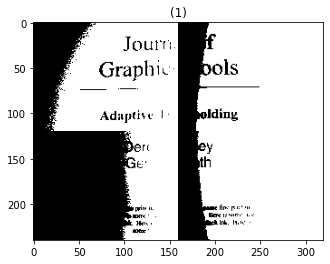

In [18]:
#1. Global thresholding:
global_book_threshold_img = book_img > getThreshold(book_img)

#2. Local thresholding:
#2.1 Partition the image:
middle_pt = (int(book_img.shape[0] / 2), int(book_img.shape[1] / 2))

top_left_img = book_img[0:middle_pt[0], 0:middle_pt[1]]
buttom_left_img = book_img[middle_pt[0]:book_img.shape[0] + 1, 0:middle_pt[1]]
top_right_img = book_img[0:middle_pt[0], middle_pt[1]:book_img.shape[1] + 1]
buttom_right_img = book_img[middle_pt[0]:book_img.shape[0] + 1, middle_pt[1]:book_img.shape[1] + 1]

#Gamma:
top_left_img = GammaCorrection(top_left_img, 1, 1.8)
buttom_left_img = GammaCorrection(buttom_left_img, 1, 1.4)

#2.2 Binarize sub-images:
top_left_img = top_left_img > getThreshold(top_left_img)
buttom_left_img = buttom_left_img > getThreshold(buttom_left_img)
top_right_img = top_right_img > getThreshold(top_right_img)
buttom_right_img = buttom_right_img > getThreshold(buttom_right_img)

#show_images([top_left_img, buttom_left_img, top_right_img, buttom_right_img])


local_book_threshold_img = np.block([
    [top_left_img,    top_right_img   ],
    [buttom_left_img, buttom_right_img]
])
show_images([local_book_threshold_img])




138.0
138.0
_________
44.0
46.0
47.0
48.0
48.0
_________
194.0
192.0
190.0
190.0
_________


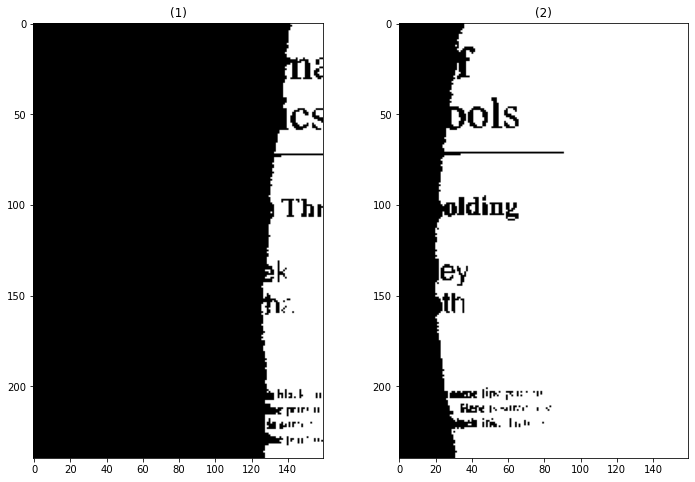

In [29]:
#1. Global thresholding:
global_book_threshold_img = book_img > getThreshold(book_img)

left_img = book_img[0:down_end_pt[0], 0:int(book_img.shape[1] / 2)]
right_img = book_img[0:down_end_pt[0], int(book_img.shape[1] / 2):int(book_img.shape[1])]

left_img = left_img > getThreshold(left_img)
right_img = right_img > getThreshold(right_img)

show_images([left_img, right_img])



138.0
138.0
_________
117.0
117.0
_________


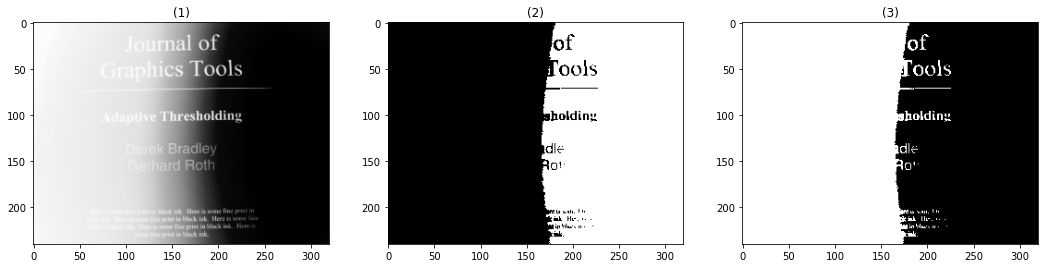

In [30]:
Global_left = book_img > getThreshold(book_img)
book_inverted = 255 - book_img
Golbal_right = book_inverted > getThreshold(book_inverted)

show_images([book_inverted, Global_left, Golbal_right])


In [18]:
'''
show_images([book_img])
Global_haha_belal = HistEqualization(book_img)
Global_haha_belal_2 =  Global_haha_belal > getThreshold(Global_haha_belal)



Global_haha_monsef = Global_haha_belal[50:Global_haha_belal.shape[0], 0:225]
Global_haha_samy = Global_haha_monsef > getThreshold(Global_haha_monsef)

show_images([Global_haha_monsef, Global_haha_samy])
show_images([book_img])
'''

'\nshow_images([book_img])\nGlobal_haha_belal = HistEqualization(book_img)\nGlobal_haha_belal_2 =  Global_haha_belal > getThreshold(Global_haha_belal)\n\n\n\nGlobal_haha_monsef = Global_haha_belal[50:Global_haha_belal.shape[0], 0:225]\nGlobal_haha_samy = Global_haha_monsef > getThreshold(Global_haha_monsef)\n\nshow_images([Global_haha_monsef, Global_haha_samy])\nshow_images([book_img])\n'

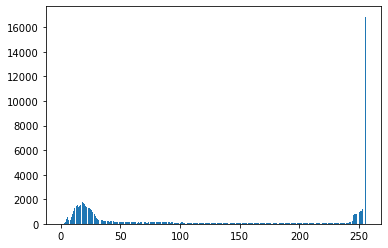

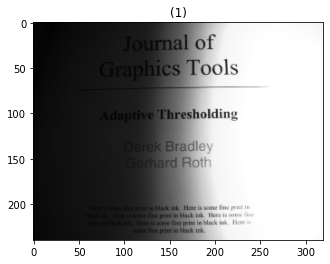

In [31]:
from skimage.filters import gaussian


filtered = gaussian(book_img, sigma = 1.5)
showHist(book_img)
show_images([book_img])

top_left_img = book_img[0:middle_pt[0], 0:middle_pt[1]]
buttom_left_img = book_img[middle_pt[0]:book_img.shape[0], 0:middle_pt[1]]
top_right_img = book_img[0:middle_pt[0], middle_pt[1]:book_img.shape[1]] 
buttom_right_img = book_img[middle_pt[0]:book_img.shape[0], middle_pt[1]:book_img.shape[1]]
